# **1. Multilayer Perceptron optimization**

## 1.1. MLP with different number of nodes

### 1.1.1. Training curve

In [1]:
# study of mlp learning curves given different number of nodes for multi-class classification
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf



nodes=1: 0.132
nodes=2: 0.330
nodes=3: 0.624
nodes=4: 0.812
nodes=5: 0.926
nodes=6: 0.990
nodes=7: 1.000
nodes=8: 1.000
nodes=9: 1.000
nodes=10: 1.000


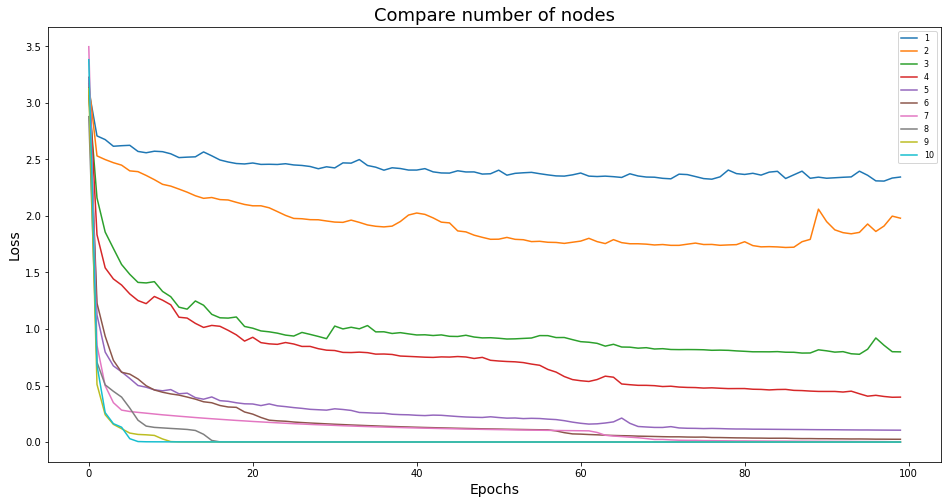

In [ ]:
# study of mlp learning curves given different number of nodes for multi-class classification
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# prepare multi-class classification dataset
def create_dataset():
  # generate 2d classification dataset
  X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2,
      random_state=2)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, trainy, testX, testy

# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
  # configure the model based on the data
  n_input, n_classes = trainX.shape[1], testy.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model on train set
  history = model.fit(trainX, trainy, epochs=100, verbose=0)
  # evaluate model on test set
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  return history, test_acc

# prepare dataset
trainX, trainy, testX, testy = create_dataset()
# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# seed
np.random.seed(42)
tf.random.set_seed(42)

plt.figure(figsize = (16,8))
for n_nodes in num_nodes:
  # evaluate model with a given number of nodes
  history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
  # summarize final test set accuracy
  print('nodes=%d: %.3f' % (n_nodes, result))
  # plot learning curve
  plt.plot(history.history['loss'], label=str(n_nodes))
# show the plot
plt.title("Compare number of nodes", fontsize = 18)
plt.ylabel("Loss", fontsize = 14)
plt.xlabel("Epochs", fontsize = 14)
plt.legend(fontsize = 8)
plt.show()

### 1.1.2. Validation curve

nodes=1: 0.132
nodes=2: 0.330


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


nodes=3: 0.624
nodes=4: 0.812
nodes=5: 0.926
nodes=6: 0.990
nodes=7: 1.000
nodes=8: 1.000
nodes=9: 1.000
nodes=10: 1.000


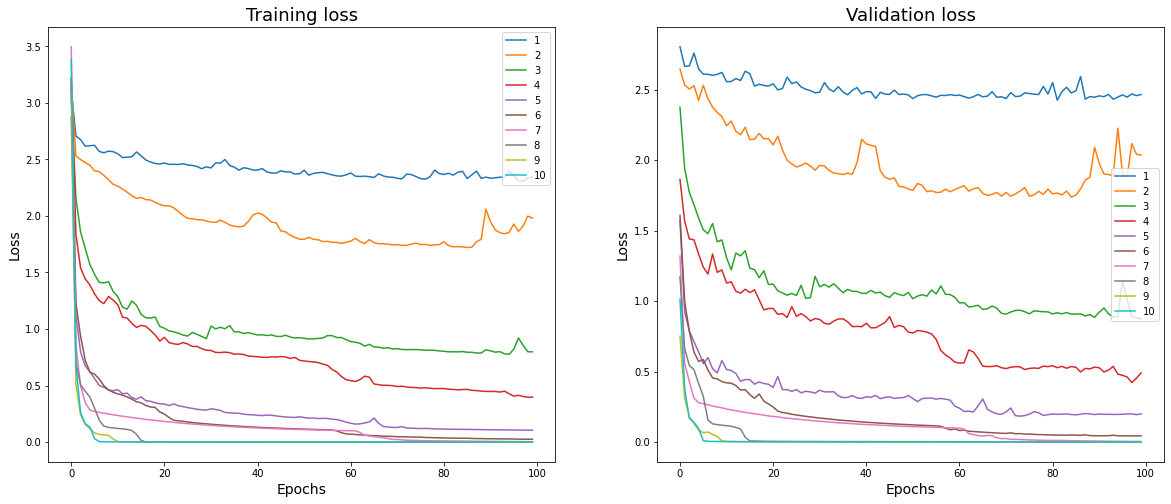

In [ ]:
# study of mlp learning curves given different number of nodes for multi-class classification
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# prepare multi-class classification dataset
def create_dataset():
  # generate 2d classification dataset
  X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2,
      random_state=2)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, trainy, testX, testy


# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
  # configure the model based on the data
  n_input, n_classes = trainX.shape[1], testy.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 
  # fit model on train set
  history = model.fit(trainX, trainy, validation_data= (testX, testy), epochs=100, verbose=0)
  # evaluate model on test set
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  return history, test_acc

# prepare dataset
trainX, trainy, testX, testy = create_dataset()

# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# seed
np.random.seed(42)
tf.random.set_seed(42)


#
plt.figure(figsize = (20,8))
for n_nodes in num_nodes:
  # evaluate model with a given number of nodes
  history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
  # summarize final test set accuracy
  print('nodes=%d: %.3f' % (n_nodes, result))
  
  # plot learning curve
  plt.subplot(121)
  plt.title("Training loss", fontsize = 18)
  plt.xlabel("Epochs", fontsize = 14)
  plt.ylabel("Loss", fontsize = 14)
  plt.plot(history.history['loss'], label=str(n_nodes))
  plt.legend()

  # plot validation curve
  plt.subplot(122)
  plt.title("Validation loss", fontsize = 18)
  plt.xlabel("Epochs", fontsize = 14)
  plt.ylabel("Loss", fontsize = 14)
  plt.plot(history.history['val_loss'], label=str(n_nodes))
  plt.legend()

plt.show()

## 1.2. MLP with different number of layers

### 1.2.1. Training curve

layers=1: 1.000
layers=2: 1.000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


layers=3: 0.998
layers=4: 0.648
layers=5: 0.174


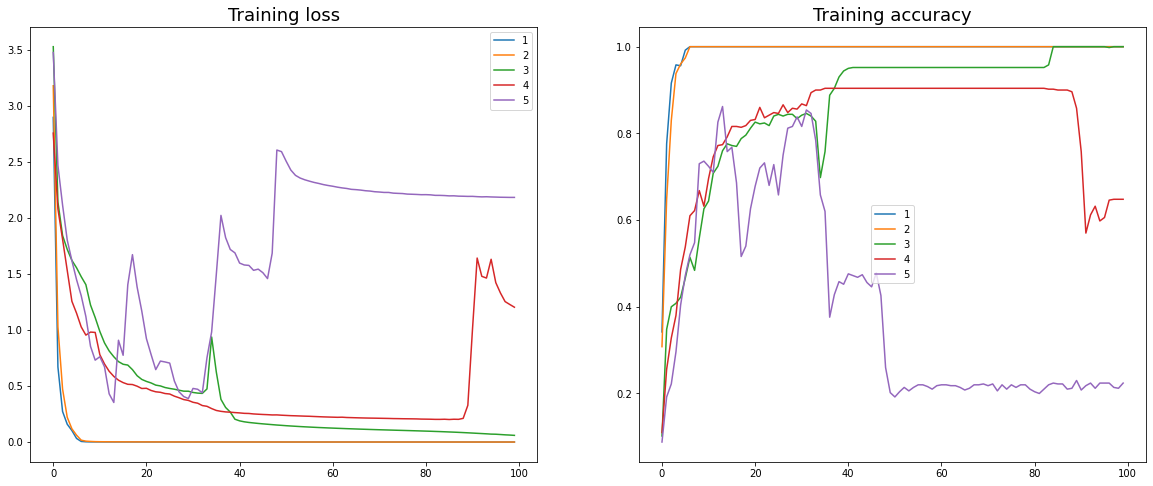

In [ ]:
# study of mlp learning curves given different number of layers for multi-classclassification
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow
import numpy as np

# prepare multi-class classification dataset
def create_dataset():
  # generate 2d classification dataset
  X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2,
      random_state=2)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, trainy, testX, testy

# fit model with given number of layers, returns test set accuracy
def evaluate_model(n_layers, trainX, trainy, testX, testy):
  # configure the model based on the data
  n_input, n_classes = trainX.shape[1], testy.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform')) 
  for _ in range(1, n_layers):
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # fit model
  history = model.fit(trainX, trainy, epochs=100, verbose=0)
  # evaluate model on test set
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  return history, test_acc

# get dataset
trainX, trainy, testX, testy = create_dataset()

# evaluate model and plot learning curve of model with given number of layers

# seed
np.random.seed(42)
tf.random.set_seed(42)


all_history = list()
num_layers = [1, 2, 3, 4, 5]
plt.figure(figsize=(20,8))
for n_layers in num_layers:
  # evaluate model with a given number of layers
  history, result = evaluate_model(n_layers, trainX, trainy, testX, testy) 
  print('layers=%d: %.3f' % (n_layers, result))
# plot learning curve
  plt.subplot(121)
  plt.title("Training loss", fontsize = 18)
  plt.plot(history.history['loss'], label=str(n_layers))
  plt.legend()
  plt.subplot(122)
  plt.title("Training accuracy", fontsize = 18)
  plt.plot(history.history['accuracy'], label=str(n_layers))
  plt.legend()

plt.show()

### 1.2.2. Validation curve

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


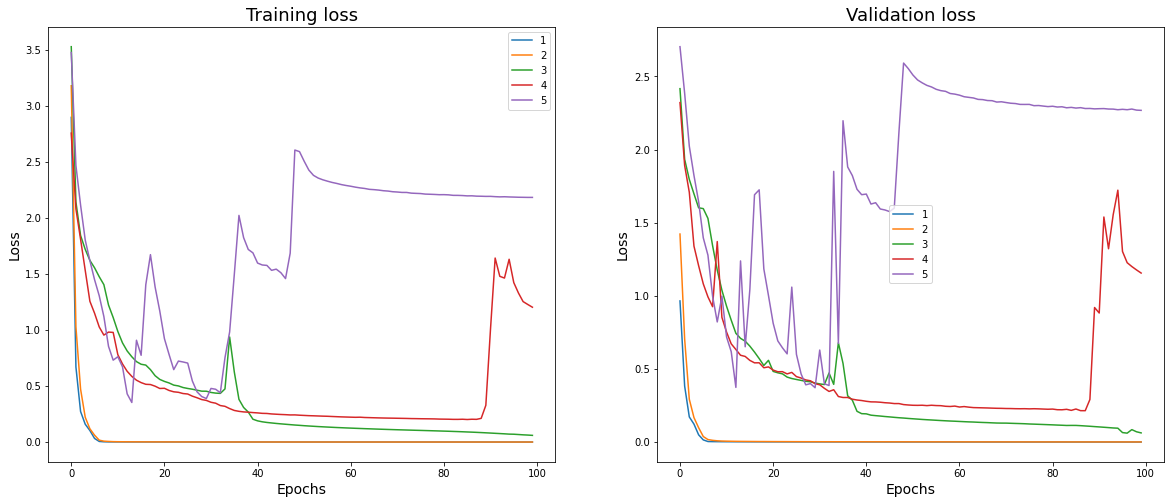

In [ ]:
# study of mlp learning curves given different number of layers for multi-classclassification
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow
import numpy as np

# prepare multi-class classification dataset
def create_dataset():
  # generate 2d classification dataset
  X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2,
      random_state=2)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, trainy, testX, testy

# fit model with given number of layers, returns test set accuracy
def evaluate_model(n_layers, trainX, trainy, testX, testy):
  # configure the model based on the data
  n_input, n_classes = trainX.shape[1], testy.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform')) 
  for _ in range(1, n_layers):
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 
  # fit model
  history = model.fit(trainX, trainy, validation_data = (testX, testy), epochs=100, verbose=0)
  
  return history

# get dataset
trainX, trainy, testX, testy = create_dataset()

# evaluate model and plot learning curve of model with given number of layers

# seed
np.random.seed(42)
tf.random.set_seed(42)


all_history = list()
num_layers = [1, 2, 3, 4, 5]
plt.figure(figsize=(20,8))
for n_layers in num_layers:
  # evaluate model with a given number of layers
  history = evaluate_model(n_layers, trainX, trainy, testX, testy) 
# plot learning curve
  plt.subplot(121)
  plt.title("Training loss", fontsize = 18)
  plt.xlabel("Epochs", fontsize = 14)
  plt.ylabel("Loss", fontsize = 14)
  plt.plot(history.history['loss'], label=str(n_layers))
  plt.legend()

  # plot validation curve
  plt.subplot(122)
  plt.title("Validation loss", fontsize = 18)
  plt.xlabel("Epochs", fontsize = 14)
  plt.ylabel("Loss", fontsize = 14)
  plt.plot(history.history['val_loss'], label=str(n_layers))
  plt.legend()

plt.show()

# **2. Configure Gradient Precision with Batch Size**

## 2.1. Batch Gradient Descent

Train: 0.806, Test: 0.836


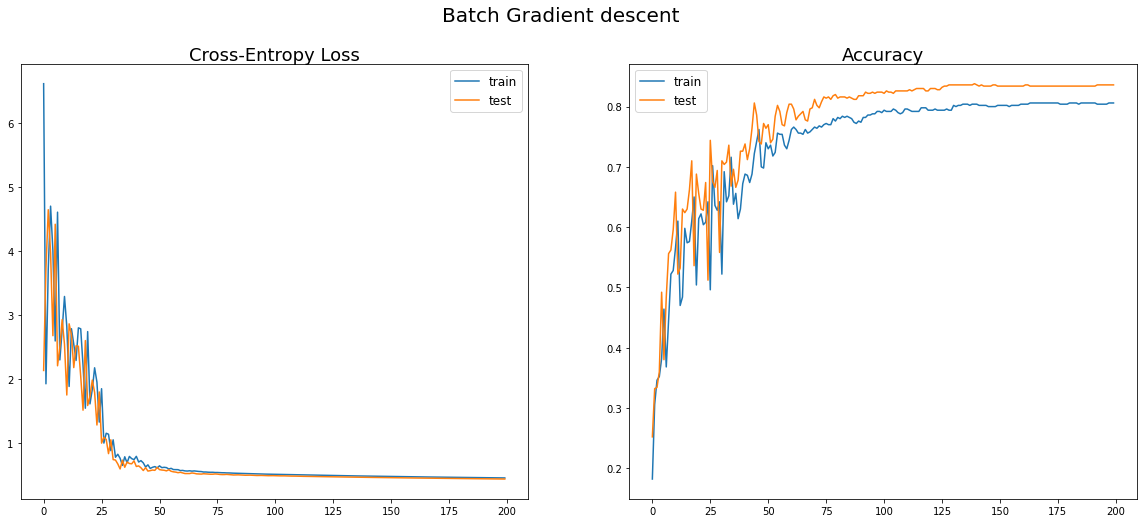

In [ ]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


#seed
np.random.seed(42)
tf.random.set_seed(42)

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0) 
_, test_acc = model.evaluate(testX, testy, verbose=0) 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc)) 

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.suptitle('Batch Gradient descent', fontsize = 20)
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18) 
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)

# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18) 
plt.plot(history.history['accuracy'], label='train') 
plt.plot(history.history['val_accuracy'], label='test') 
plt.legend(fontsize = 12)
plt.show()

## 2.2. SGD

Train: 0.834, Test: 0.802


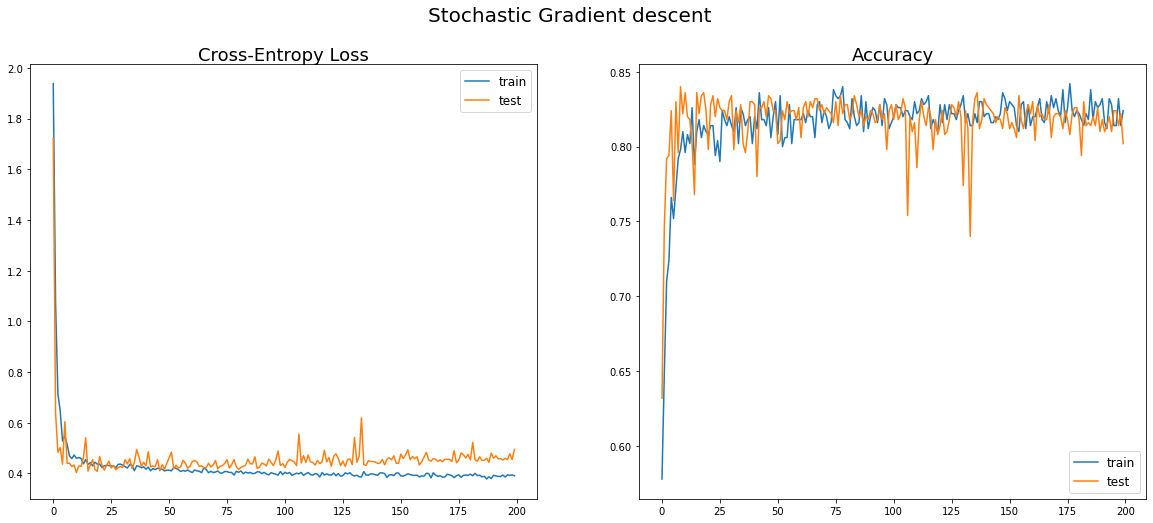

In [ ]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0,
batch_size=1)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0) 
_, test_acc = model.evaluate(testX, testy, verbose=0) 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc)) 

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.suptitle('Stochastic Gradient descent', fontsize = 20)
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18) 
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)

# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18) 
plt.plot(history.history['accuracy'], label='train') 
plt.plot(history.history['val_accuracy'], label='test') 
plt.legend(fontsize = 12)
plt.show()

## 2.3. Mini Batch Gradient Descent

Train: 0.842, Test: 0.818


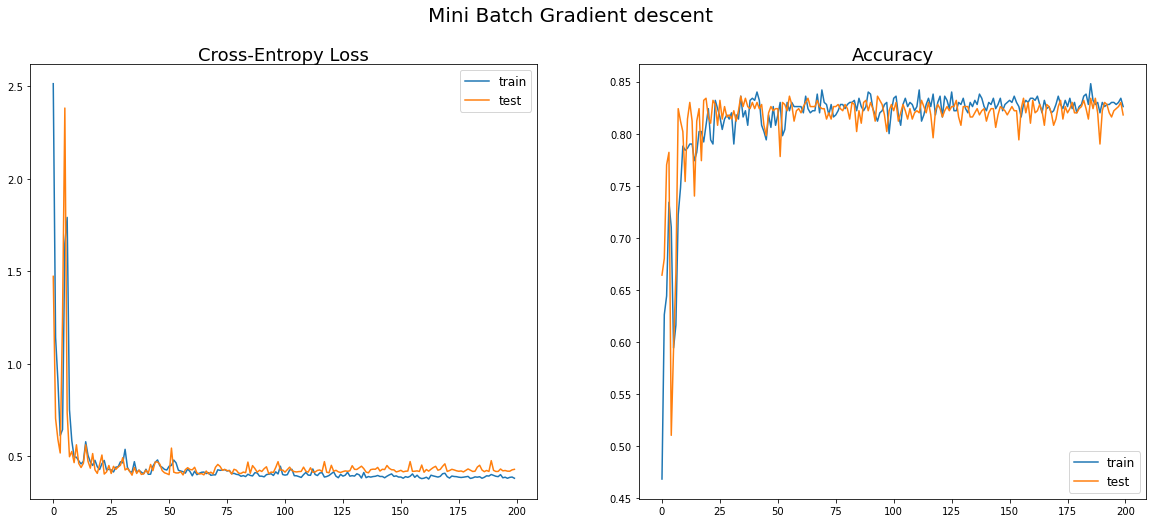

In [ ]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow
import numpy as np

np.random.seed(42)
tensorflow.random.set_seed(42)

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0,
batch_size=32)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0) 
_, test_acc = model.evaluate(testX, testy, verbose=0) 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc)) 

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.suptitle('Mini Batch Gradient descent', fontsize = 20)
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18) 
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)

# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18) 
plt.plot(history.history['accuracy'], label='train') 
plt.plot(history.history['val_accuracy'], label='test') 
plt.legend(fontsize = 12)
plt.show()

## 2.4. Effect of Batch Size on Model Behavior

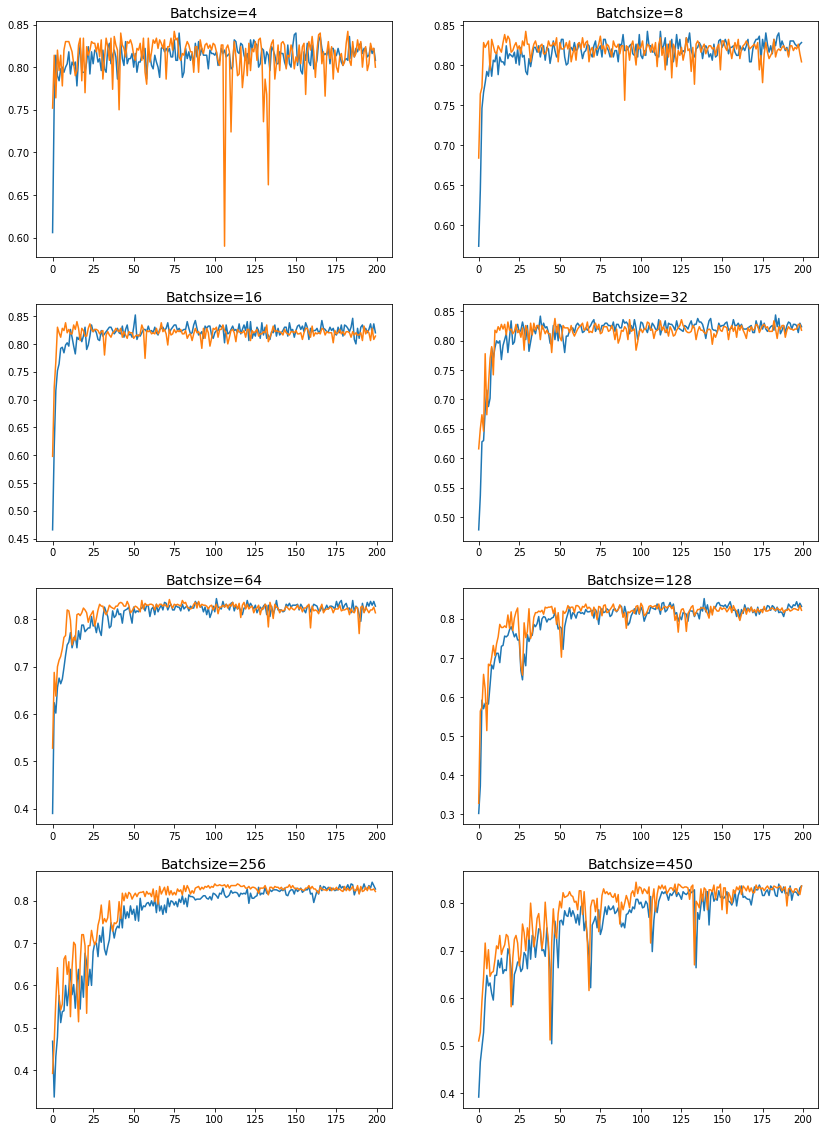

In [ ]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow
import numpy as np

np.random.seed(42)
tensorflow.random.set_seed(42)

# prepare train and test dataset
def prepare_data():
  # generate 2d classification dataset
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
# define model
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(3, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200,
      verbose=0, batch_size=n_batch)
  # plot learning curves
  plt.plot(history.history['accuracy'], label='train') 
  plt.plot(history.history['val_accuracy'], label='test') 
  plt.title('Batchsize='+str(n_batch), pad=-40, fontsize = 14)


# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
plt.figure(figsize = (14, 20))
for i in range(len(batch_sizes)):
  # determine the plot number
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a batch size
  fit_model(trainX, trainy, testX, testy, batch_sizes[i])
# show learning curves
plt.show()

# **3. Loss Function**

## 3.1. Regression Loss Functions Case Study

### 3.1.1. Mean squared loss

Epoch 1/100
16/16 [==============================] - 0s 9ms/step - loss: 1.3402 - val_loss: 0.4427
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3459 - val_loss: 0.1842
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1254 - val_loss: 0.1153
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0743 - val_loss: 0.0854
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0577 - val_loss: 0.0722
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0456 - val_loss: 0.0711
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0411 - val_loss: 0.0612
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0339 - val_loss: 0.0528
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0305 - val_loss: 0.0503
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - val_loss: 0.0443
Epoch 11/

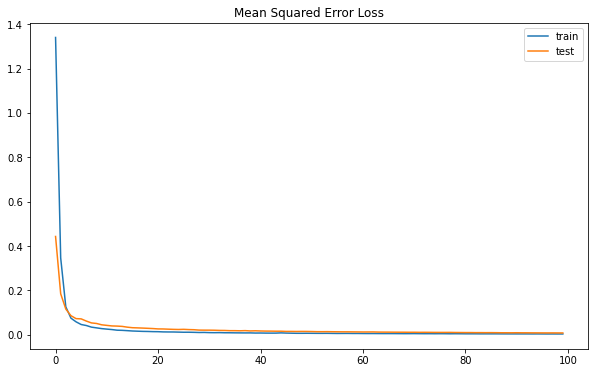

In [ ]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import tensorflow
import numpy as np

# seed
np.random.seed(42)
tensorflow.random.set_seed(42)

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1) 
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.figure(figsize=(10,6))
plt.title('Mean Squared Error Loss') 
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend()
plt.show()


### 3.1.2. Mean Squared Logarithmic Error Loss

Train: 0.152, Test: 0.185


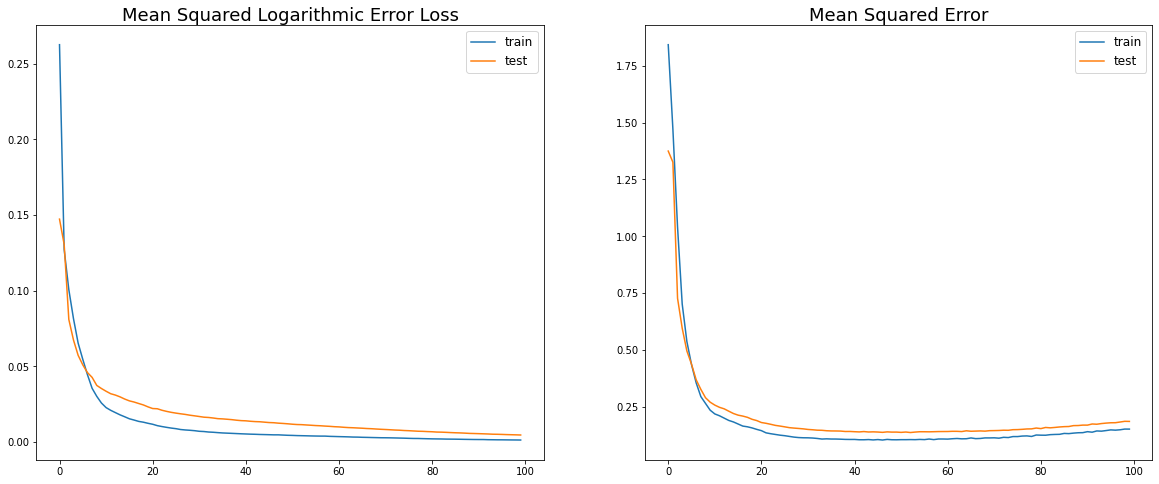

In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import tensorflow
import numpy as np

# seed
np.random.seed(42)
tensorflow.random.set_seed(42)

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) # evaluate the model
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title('Mean Squared Logarithmic Error Loss', pad=-20, fontsize = 18) 
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot mse during training
plt.subplot(122)
plt.title('Mean Squared Error', pad=-20, fontsize = 18) 
plt.plot(history.history['mse'], label='train') 
plt.plot(history.history['val_mse'], label='test')
plt.legend(fontsize = 12)
plt.show()

### 3.1.3. Mean Absolute Error Loss

Train: 0.004, Test: 0.005


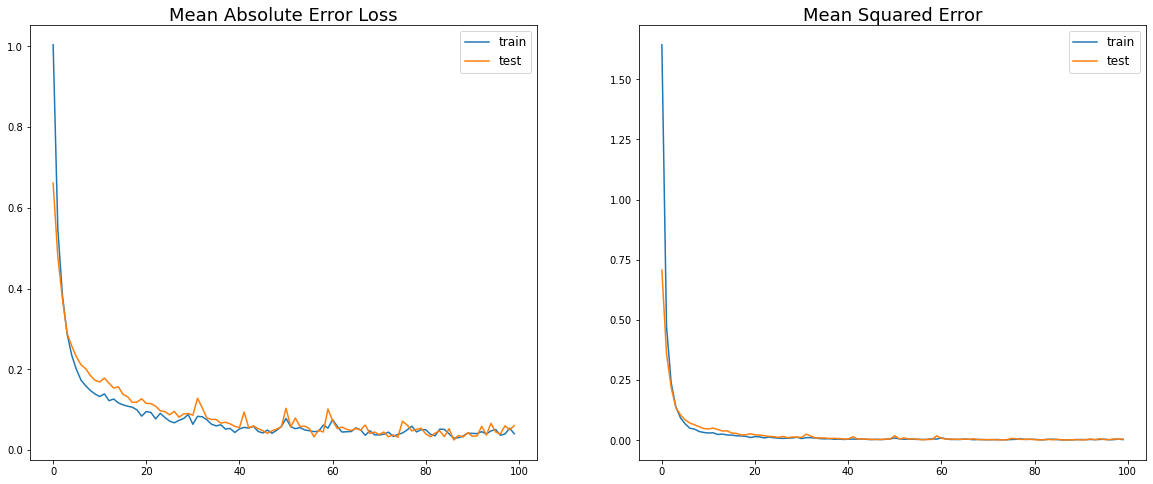

In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import tensorflow
import numpy as np

# seed
np.random.seed(42)
tensorflow.random.set_seed(42)

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) # evaluate the model
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title('Mean Absolute Error Loss', pad=-20, fontsize = 18) 
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot mse during training
plt.subplot(122)
plt.title('Mean Squared Error', pad=-20, fontsize = 18) 
plt.plot(history.history['mse'], label='train') 
plt.plot(history.history['val_mse'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 3.2. Binary Classification Loss Functions Case Study

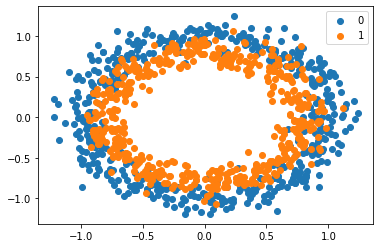

In [ ]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
import matplotlib.plt as plt
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
  samples_ix = where(y == i)
  plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
plt.legend()
plt.show()

### 3.2.1. cross-entropy loss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Train: 0.842, Test: 0.842


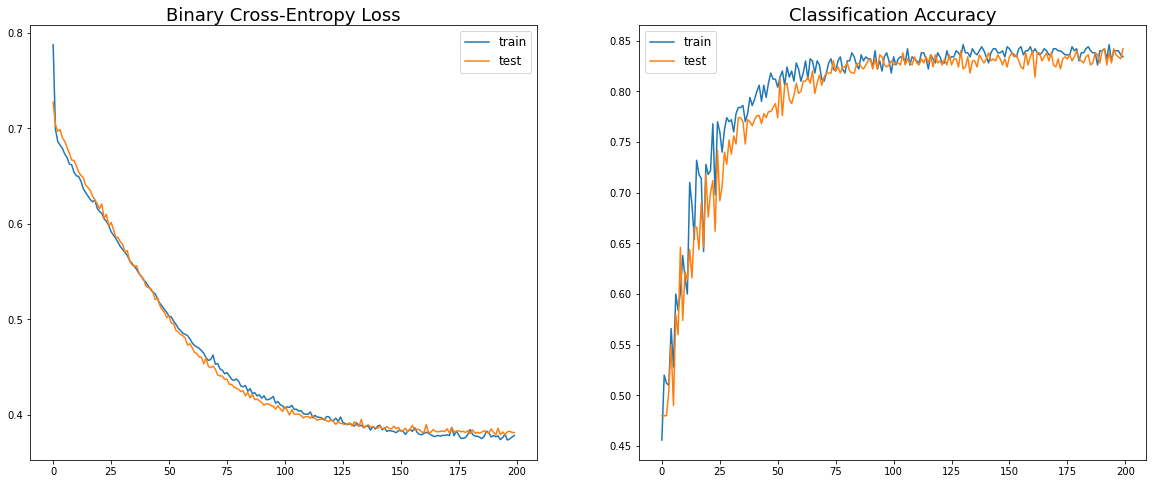

In [ ]:

# mlp for the circles problem with cross-entropy loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import tensorflow
import numpy as np
# seed
np.random.seed(42)
tensorflow.random.set_seed(42)

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0) 
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc)) # plot loss during training

# plot loss during training
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title('Binary Cross-Entropy Loss', pad=-20, fontsize = 18) 
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot mse during training
plt.subplot(122)
plt.title('Classification Accuracy', pad=-20, fontsize = 18) 
plt.plot(history.history['accuracy'], label='train') 
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

# **4. Stabilize Learning with Data Scaling**

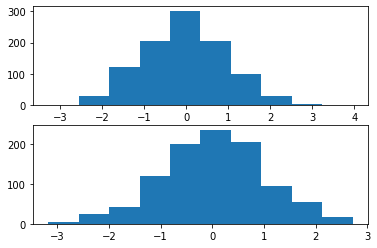

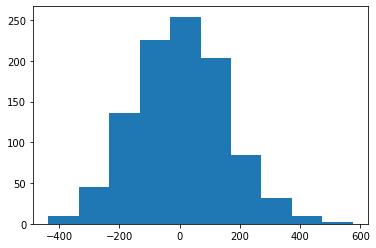

In [ ]:
# regression predictive modeling problem
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
# generate regression dataset
X, y = make_regression(n_samples = 1000, n_features = 20, noise = 0.2, random_state=1)
# histograms of input variables
plt.subplot(211)
plt.hist(X[:,0])
plt.subplot(212)
plt.hist(X[:,1])
plt.show()
# histogram of target variable
plt.hist(y)
plt.show()

## 4.1. Unscaled Data

Train: nan, Test: nan


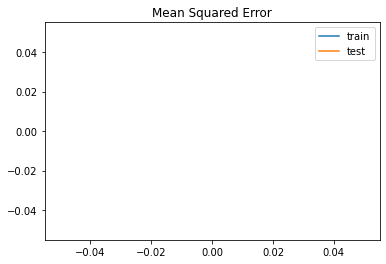

In [ ]:
# mlp with unscaled data for the regression problem
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#Seed
np.random.seed(42)
tf.random.set_seed(42)

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 4.2. Scaled output

Train: 0.003, Test: 0.008


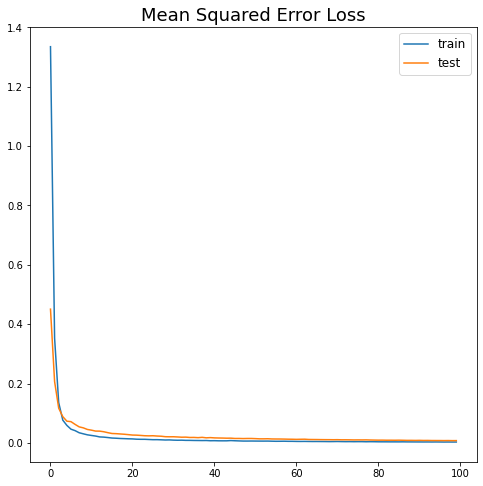

In [ ]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD

#Seed
np.random.seed(42)
tf.random.set_seed(42)

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.figure(figsize=(8,8))
plt.title('Mean Squared Error Loss', fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend(fontsize = 12)
plt.show()

## 4.3. Scaled input

In [ ]:
# compare scaling methods for mlp inputs on regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std

>0.009
>0.009
>0.002
>0.009
>0.015
>0.010
>0.002
>0.011
>0.007
>0.002
>0.005
>0.008
>0.008
>0.011
>0.001
>0.007
>0.008
>0.008
>0.011
>0.009
>0.012
>0.002
>0.007
>0.008
>0.006
>0.001
>0.004
>0.004
>0.004
>0.005
>0.000
>0.000
>0.001
>0.000
>0.001
>0.000
>0.000
>0.001
>0.000
>0.001
>0.000
>0.001
>0.001
>0.000
>0.001
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.001
>0.000
>0.001
>0.009
>0.009
>0.010
>0.008
>0.008
>0.007
>0.011
>0.011
>0.010
>0.012
>0.011
>0.005
>0.003
>0.010
>0.008
>0.009
>0.009
>0.001
>0.005
>0.002
>0.005
>0.007
>0.009
>0.015
>0.014
>0.009
>0.005
>0.002
>0.007
>0.001
Unscaled: 0.007 (0.004)
Normalized: 0.000 (0.000)
Standardized: 0.008 (0.004)


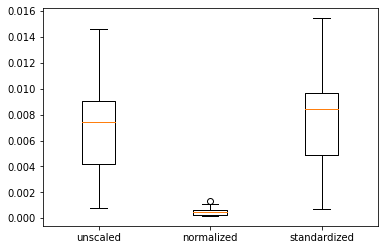

In [ ]:
# prepare dataset with input and output scalers, can be none
def get_dataset(input_scaler, output_scaler):
  # generate dataset
  X, y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=1)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  # scale inputs
  if input_scaler is not None:
# fit scaler
    input_scaler.fit(trainX)
    # transform training dataset
    trainX = input_scaler.transform(trainX)
    # transform test dataset
    testX = input_scaler.transform(testX)
  if output_scaler is not None:
    # reshape 1d arrays to 2d arrays
    trainy = trainy.reshape(len(trainy), 1)
    testy = testy.reshape(len(trainy), 1)
    # fit scaler on training dataset
    output_scaler.fit(trainy)
    # transform training dataset
    trainy = output_scaler.transform(trainy)
    # transform test dataset
    testy = output_scaler.transform(testy)
  return trainX, trainy, testX, testy

# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainy, testX, testy):
# define model
  model = Sequential()
  model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(1, activation='linear'))
  # compile model
  model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9)) 
  # fit model
  model.fit(trainX, trainy, epochs=100, verbose=0)
  # evaluate the model
  test_mse = model.evaluate(testX, testy, verbose=0)
  return test_mse

# evaluate model multiple times with given input and output scalers
def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
  # get dataset
  trainX, trainy, testX, testy = get_dataset(input_scaler, output_scaler)
  # repeated evaluation of model
  results = list()
  for _ in range(n_repeats):
    test_mse = evaluate_model(trainX, trainy, testX, testy) 
    print('>%.3f' % test_mse)
    results.append(test_mse)
  return results  

# unscaled inputs
results_unscaled_inputs = repeated_evaluation(None, StandardScaler())
# normalized inputs
results_normalized_inputs = repeated_evaluation(MinMaxScaler(), StandardScaler())
# standardized inputs
results_standardized_inputs = repeated_evaluation(StandardScaler(), StandardScaler())
# summarize results
print('Unscaled: %.3f (%.3f)' % (mean(results_unscaled_inputs), std(results_unscaled_inputs)))
print('Normalized: %.3f (%.3f)' % (mean(results_normalized_inputs), std(results_normalized_inputs)))
print('Standardized: %.3f (%.3f)' % (mean(results_standardized_inputs), std(results_standardized_inputs)))
# plot results
results = [results_unscaled_inputs, results_normalized_inputs, results_standardized_inputs] 
labels = ['unscaled', 'normalized', 'standardized']
plt.boxplot(results, labels=labels)
plt.show()

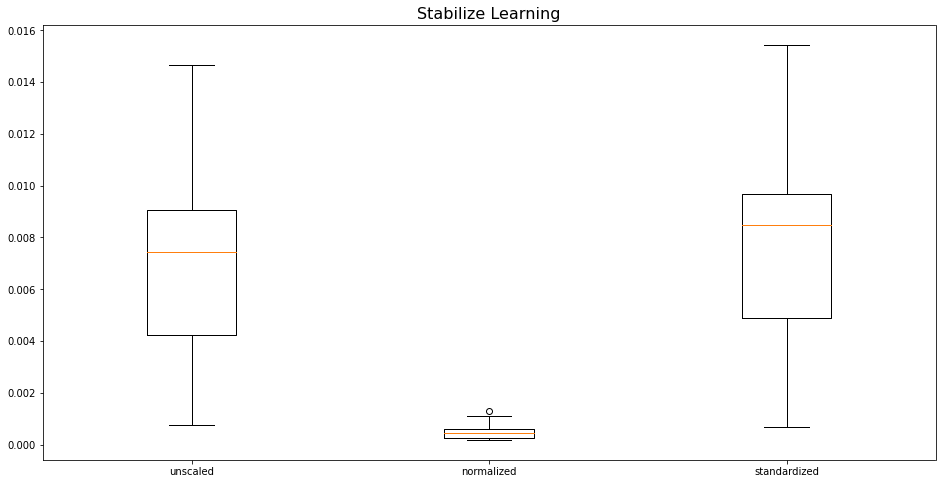

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Stabilize Learning", fontsize = 16)
plt.boxplot(results, labels=labels)
plt.show()

# **5. Vanishing Gradients**

## 5.1. Multilayer Perceptron with tanh function

Train: 0.828, Test: 0.842


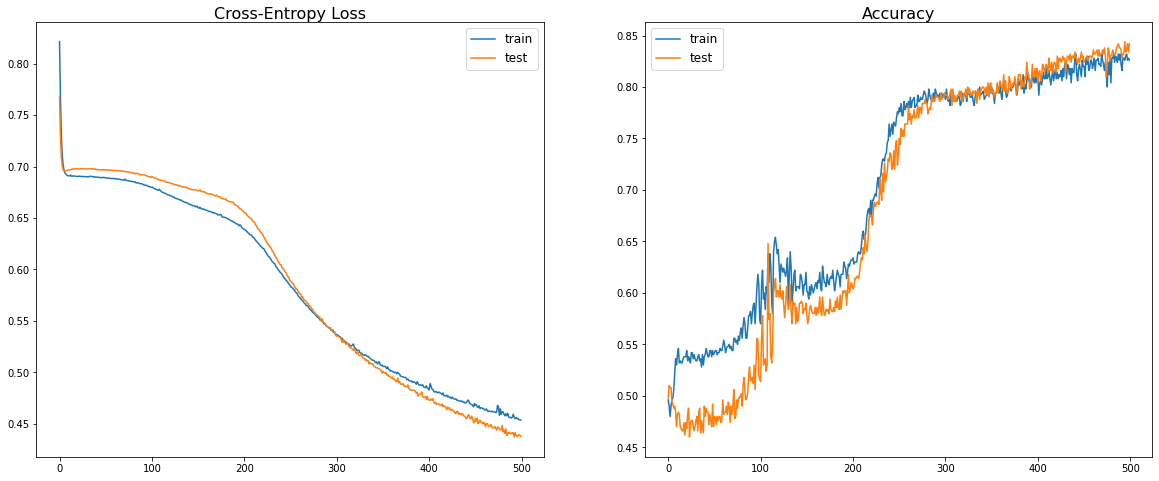

In [ ]:
# mlp with tanh for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
import tensorflow as tf 
import numpy as np

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init)) 
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
#Seed
np.random.seed(42)
tf.random.set_seed(42)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0) 

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 16)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 16)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()


## 5.2. Deeper MLP model

Train: 0.562, Test: 0.572


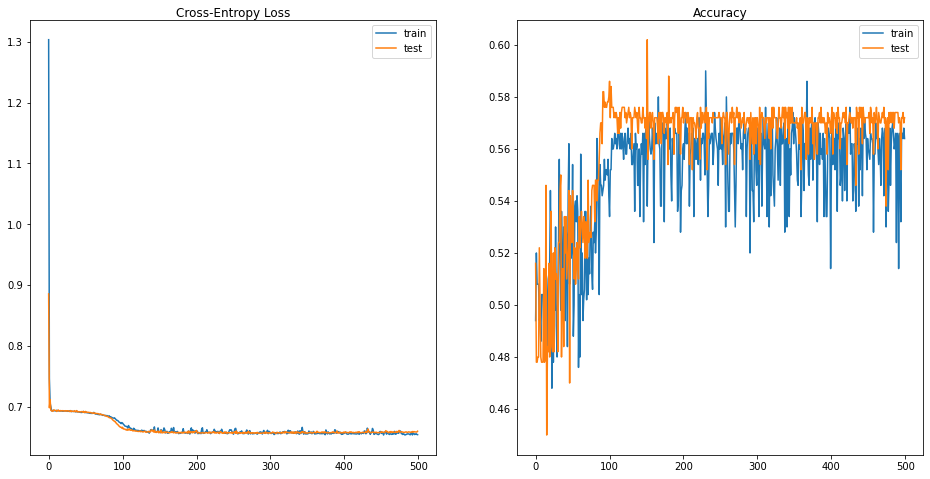

In [ ]:
# mlp with tanh for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
import tensorflow as tf
import numpy as np

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init)) 
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model

#Seed
np.random.seed(42)
tf.random.set_seed(42)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (16,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## 5.3. Deeper MLP with Relu

Train: 0.832, Test: 0.846


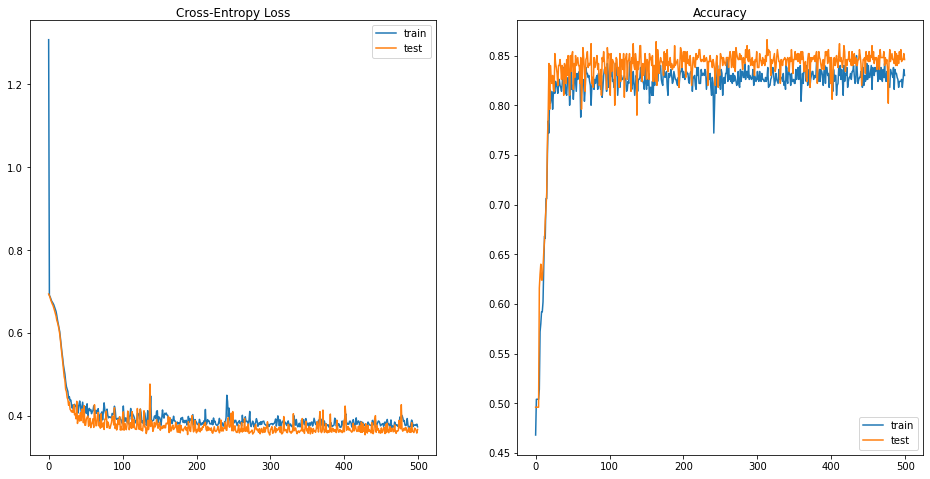

In [ ]:
# mlp with tanh for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
import tensorflow
import numpy as np

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(5, activation='relu', kernel_initializer=init))
model.add(Dense(5, activation='relu', kernel_initializer=init))

model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
np.random.seed(42)
tf.random.set_seed(42)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (16,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# **6. Exploding Gradients**

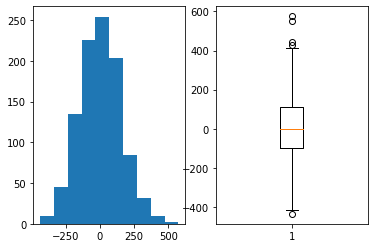

In [ ]:
# regression predictive modeling problem
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# histogram of target variable
pyplot.subplot(121)
pyplot.hist(y)
# boxplot of target variable
pyplot.subplot(122)
pyplot.boxplot(y)
pyplot.show()

## 6.1. MLP with exploding gradients

Train: nan, Test: nan


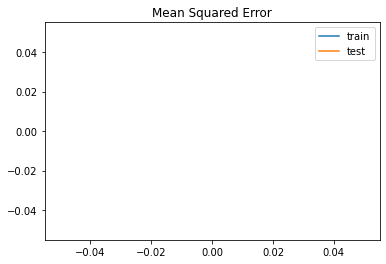

In [ ]:
# mlp with unscaled data for the regression problem
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
# fit model
np.random.seed(42)
tf.random.set_seed(42)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## 6.2. MLP With Gradient Norm Scaling

Train: 0.360, Test: 14.297


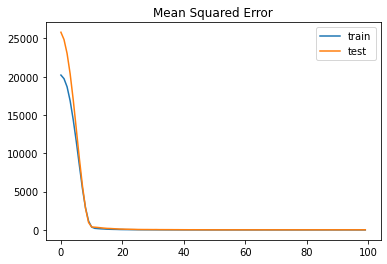

In [ ]:
# mlp with unscaled data for the regression problem with gradient norm scaling
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9, clipnorm=1.0)  #### CLIPPING NORM
model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
np.random.seed(42)
tf.random.set_seed(42)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 6.3. MLP With Gradient Value Clipping

Train: 0.807, Test: 10.332


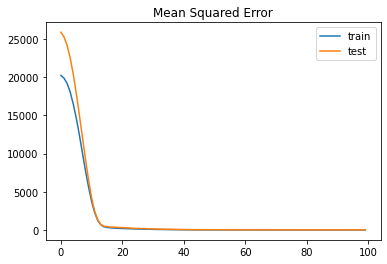

In [ ]:
# mlp with unscaled data for the regression problem with gradient norm scaling
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9, clipvalue=0.1)  #### CLIPPING VALUE
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
np.random.seed(42)
tensorflow.random.set_seed(42)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 6.4. Combination Vector Norm and Clip

Train: 3.244, Test: 15.433


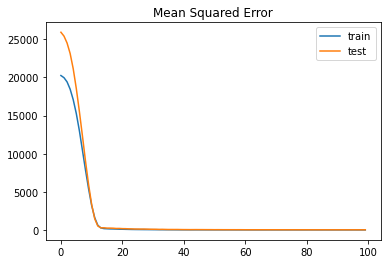

In [ ]:
# mlp with unscaled data for the regression problem with combine method
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9, clipvalue=1.0, clipnorm=1.0)  #### CLIPPING VALUE
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
np.random.seed(42)
tensorflow.random.set_seed(42)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# **7. Accelerate Learning with Batch Normalization**

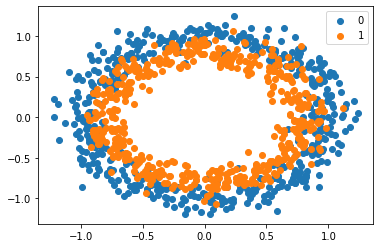

In [ ]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
  samples_ix = where(y == i)
  pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

## 7.1. Multilayer Perceptron Model

Train: 0.838, Test: 0.836


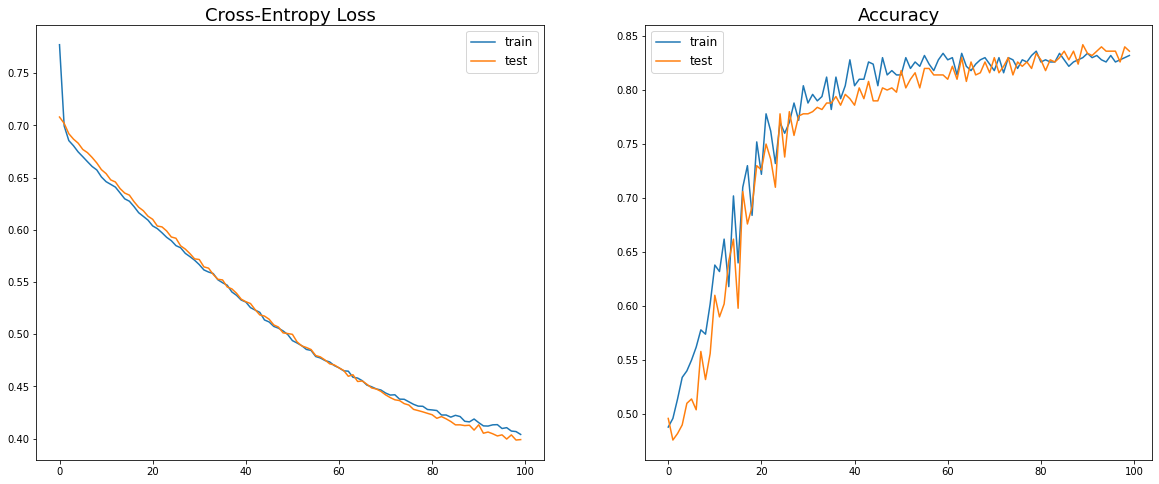

In [ ]:
# mlp for the two circles problem
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# seed
np.random.seed(42)
tensorflow.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.figure(figsize = (20,8))
pyplot.subplot(121)
pyplot.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(fontsize = 12)
# plot accuracy learning curves
pyplot.subplot(122)
pyplot.title('Accuracy', pad=-40, fontsize = 18)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend(fontsize = 12)
pyplot.show()

## 7.2. MLP With Batch Normalization

### 7.2.1. After activation function

Train: 0.834, Test: 0.846


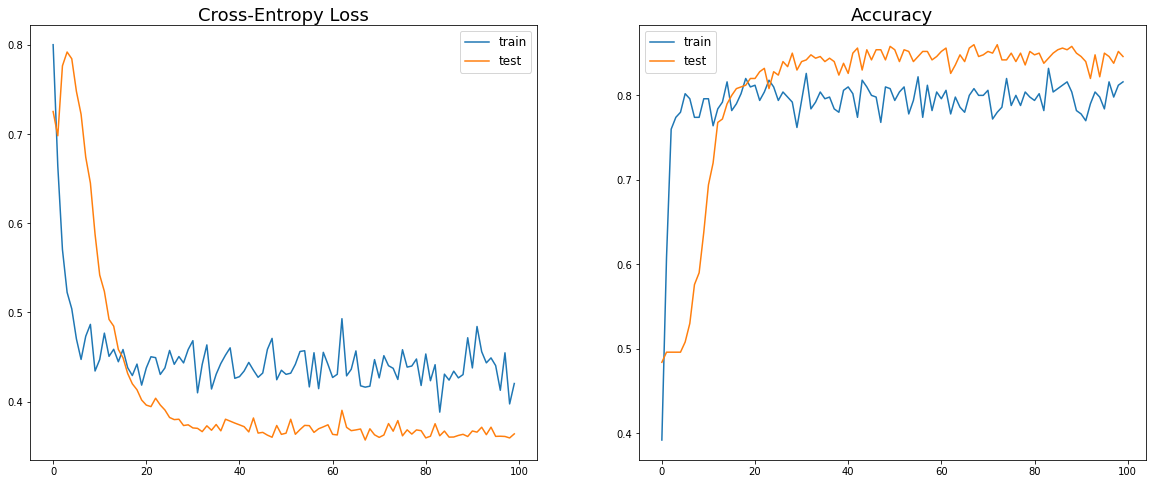

In [ ]:
# mlp for the two circles problem with batchnorm after activation function
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
np.random.seed(42)
tensorflow.random.set_seed(42)

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
pyplot.figure(figsize = (20,8))
pyplot.subplot(121)
pyplot.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(fontsize = 12)
# plot accuracy learning curves
pyplot.subplot(122)
pyplot.title('Accuracy', pad=-40, fontsize = 18)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend(fontsize = 12)
pyplot.show()

### 7.2.2. Before activation function

Train: 0.822, Test: 0.826


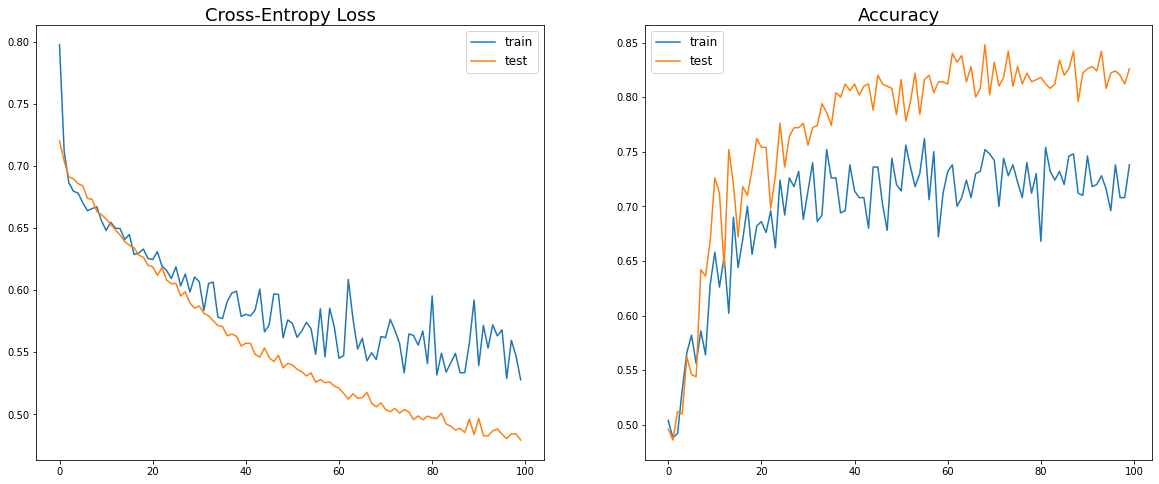

In [ ]:
# mlp for the two circles problem with batchnorm after activation function
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, kernel_initializer='he_uniform')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model

np.random.seed(42)
tensorflow.random.set_seed(42)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
pyplot.figure(figsize = (20,8))
pyplot.subplot(121)
pyplot.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(fontsize = 12)
# plot accuracy learning curves
pyplot.subplot(122)
pyplot.title('Accuracy', pad=-40, fontsize = 18)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend(fontsize = 12)
pyplot.show()

# **8. Deeper Models with Greedy Layer-Wise Pretraining**

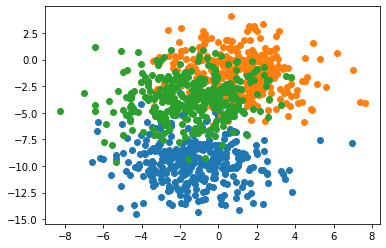

In [ ]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
  # select indices of points with the class label
  row_ix = where(y == class_value)
  # scatter plot for points with a different color
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

## 8.1. Supervised Greedy Layer-Wise Pretraining

> layers=2, train=0.840, test=0.824
> layers=3, train=0.826, test=0.828
> layers=4, train=0.830, test=0.830
> layers=5, train=0.832, test=0.832
> layers=6, train=0.832, test=0.824
> layers=7, train=0.836, test=0.824
> layers=8, train=0.836, test=0.822
> layers=9, train=0.838, test=0.820
> layers=10, train=0.838, test=0.820
> layers=11, train=0.838, test=0.818
> layers=12, train=0.838, test=0.816


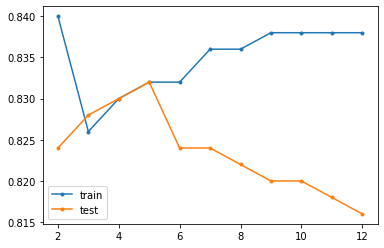

In [ ]:
# supervised greedy layer-wise pretraining for blobs classification problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
# prepare the dataset
def prepare_data():
  # generate 2d classification dataset
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, testX, trainy, testy

# define and fit the base model
def get_base_model(trainX, trainy):
# define model
  model = Sequential()
  model.add(Dense(10, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(3, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # fit model
  model.fit(trainX, trainy, epochs=100, verbose=0)
  return model

# evaluate a fit model
def evaluate_model(model, trainX, testX, trainy, testy):
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  return train_acc, test_acc


# add one new layer and re-train only the new layer
def add_layer(model, trainX, trainy):
  # remember the current output layer
  output_layer = model.layers[-1]
  # remove the output layer
  model.pop()
  # mark all remaining layers as non-trainable
  for layer in model.layers:
    layer.trainable = False
  # add a new hidden layer
  model.add(Dense(10, activation='relu', kernel_initializer='he_uniform')) # re-add the output layer
  model.add(output_layer)
  # fit model
  model.fit(trainX, trainy, epochs=100, verbose=0)

# prepare data
trainX, testX, trainy, testy = prepare_data()
# get the base model
model = get_base_model(trainX, trainy)
# evaluate the base model
np.random.seed(42)
tensorflow.random.set_seed(42)

scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc)) 
scores[len(model.layers)] = (train_acc, test_acc)
# add layers and evaluate the updated model
n_layers = 10
for i in range(n_layers):
# add layer
  add_layer(model, trainX, trainy)
  # evaluate model
  train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
  print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc)) # store scores for plotting
  scores[len(model.layers)] = (train_acc, test_acc)
# plot number of added layers vs accuracy
pyplot.plot(np.fromiter(scores.keys(), dtype = np.float), [scores[k][0] for k in scores.keys()], label='train', marker='.')
pyplot.plot(np.fromiter(scores.keys(), dtype = np.float), [scores[k][1] for k in scores.keys()], label='test', marker='.') 
pyplot.legend()
pyplot.show()

## 8.2. Unsupervised Greedy Layer-Wise Pretraining

> reconstruction error train=0.001, test=0.002


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


> classifier accuracy layers=2, train=0.844, test=0.830
> reconstruction error train=0.009, test=0.020
> reconstruction error train=2.199, test=2.486
> reconstruction error train=10.418, test=10.721
> reconstruction error train=10.418, test=10.721
> reconstruction error train=10.418, test=10.721
> classifier accuracy layers=7, train=0.342, test=0.326


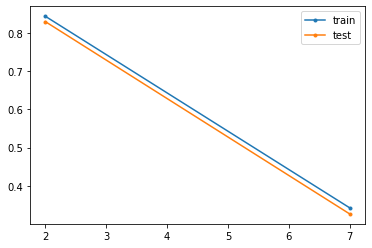

In [ ]:
# unsupervised greedy layer-wise pretraining for blobs classification problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
# prepare the dataset
def prepare_data():
  # generate 2d classification dataset
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, testX, trainy, testy

# define, fit and evaluate the base autoencoder
def base_autoencoder(trainX, testX):
# define model
  model = Sequential()
  model.add(Dense(10, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(2, activation='linear'))
    # compile model
  model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9)) # fit model
  model.fit(trainX, trainX, epochs=100, verbose=0)
  # evaluate reconstruction loss
  train_mse = model.evaluate(trainX, trainX, verbose=0)
  test_mse = model.evaluate(testX, testX, verbose=0)
  print('> reconstruction error train=%.3f, test=%.3f' % (train_mse, test_mse)) 
  return model

# evaluate the autoencoder as a classifier
def evaluate_autoencoder_as_classifier(model, trainX, trainy, testX, testy):
  # remember the current output layer
  output_layer = model.layers[-1]
  # remove the output layer
  model.pop()
  # mark all remaining layers as non-trainable
  for layer in model.layers:
    layer.trainable = False
  # add new output layer
  model.add(Dense(3, activation='softmax'))
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
  metrics=['acc']) # fit model
  model.fit(trainX, trainy, epochs=100, verbose=0)
  # evaluate model
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  # put the model back together
  model.pop()
  model.add(output_layer)
  model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9)) 
  return train_acc, test_acc

# add one new layer and re-train only the new layer
def add_layer_to_autoencoder(model, trainX, testX):
  # remember the current output layer
  output_layer = model.layers[-1]
  # remove the output layer
  model.pop()
  # mark all remaining layers as non-trainable
  for layer in model.layers:
    layer.trainable = False
  # add a new hidden layer
  model.add(Dense(10, activation='relu', kernel_initializer='he_uniform')) # re-add the output layer
  model.add(output_layer)
  # fit model
  model.fit(trainX, trainX, epochs=100, verbose=0)
  # evaluate reconstruction loss
  train_mse = model.evaluate(trainX, trainX, verbose=0)
  test_mse = model.evaluate(testX, testX, verbose=0)
  print('> reconstruction error train=%.3f, test=%.3f' % (train_mse, test_mse))

# prepare data
trainX, testX, trainy, testy = prepare_data()
# get the base autoencoder
model = base_autoencoder(trainX, testX)
# evaluate the base model
np.random.seed(42)
tensorflow.random.set_seed(42)
scores = dict()
train_acc, test_acc = evaluate_autoencoder_as_classifier(model, trainX, trainy, testX,testy)
print('> classifier accuracy layers=%d, train=%.3f, test=%.3f' % (len(model.layers),train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)
# add layers and evaluate the updated model
n_layers = 5
for _ in range(n_layers):
# add layer
  add_layer_to_autoencoder(model, trainX, testX)
  # evaluate model
  train_acc, test_acc = evaluate_autoencoder_as_classifier(model, trainX, trainy, testX,
      testy)
print('> classifier accuracy layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
  # store scores for plotting
scores[len(model.layers)] = (train_acc, test_acc)
# plot number of added layers vs accuracy
keys = np.fromiter(scores.keys(), dtype = np.float)
pyplot.plot(keys, [scores[k][0] for k in keys], label='train', marker='.') 
pyplot.plot(keys, [scores[k][1] for k in keys], label='test', marker='.') 
pyplot.legend()
pyplot.show()

# **9. Transfer Learning**

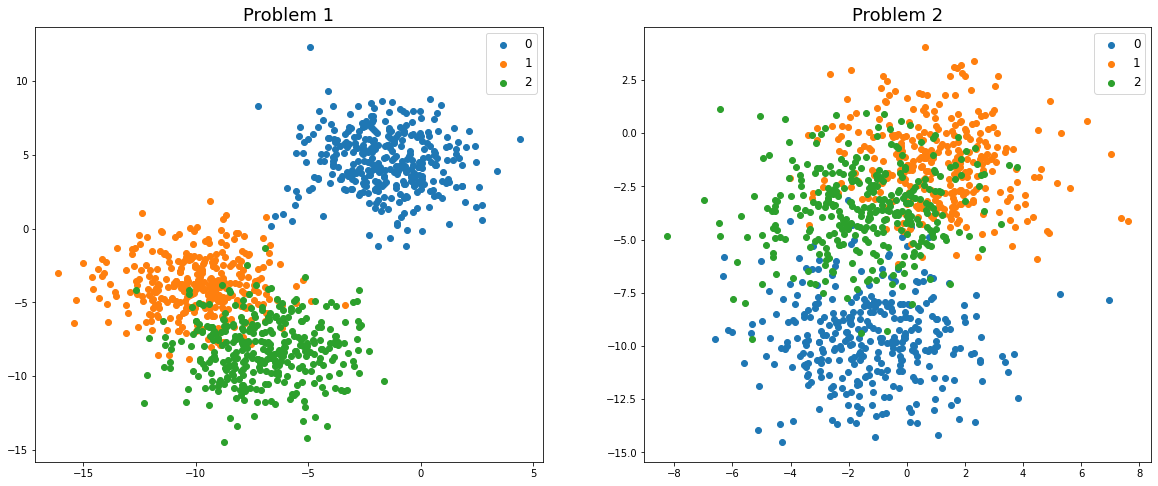

In [ ]:
# plot of blobs multiclass classification problems 1 and 2
from sklearn.datasets import make_blobs
from numpy import where
from matplotlib import pyplot
# generate samples for blobs problem with a given random seed
def samples_for_seed(seed):
  # generate samples
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2,
      random_state=seed)
  return X, y

# create a scatter plot of points colored by class value
def plot_samples(X, y, classes=3):
  # plot points for each class
  for i in range(classes):
    # select indices of points with each class label
    samples_ix = where(y == i)
    # plot points for this class with a given color
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label = i)
    pyplot.legend(fontsize = 12)

# generate multiple problems
n_problems = 2
pyplot.figure(figsize = (20,8))
for i in range(1, n_problems+1):
  # specify subplot
  pyplot.subplot(120 + i)
  pyplot.title(f"Problem {i}", fontsize = 18)
  # generate samples
  X, y = samples_for_seed(i)
  # scatter plot of samples
  plot_samples(X, y)
# plot figure
pyplot.show()

## 9.1. Multilayer Perceptron Model for Problem 1

Train: 0.908, Test: 0.934


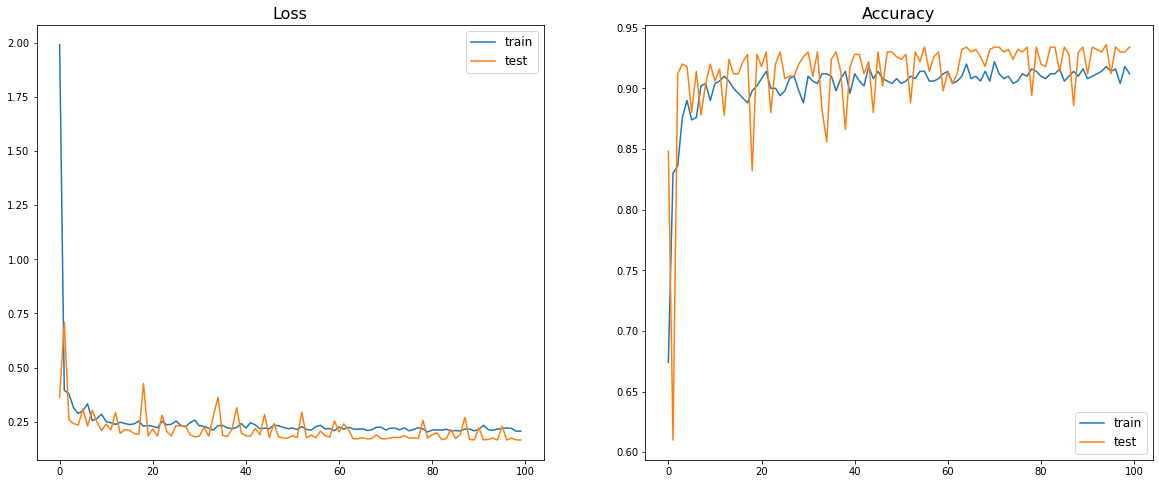

In [ ]:
# fit mlp model on problem 1 and save model to file
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
  # generate samples
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2,
      random_state=seed)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, trainy, testX, testy

# define and fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
  # define model
  model = Sequential()
  model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(5, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(3, activation='softmax'))
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 
  return model, history

# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy): 
  # evaluate the model
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0) 
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss during training
  pyplot.figure(figsize = (20,8))
  pyplot.subplot(121)
  pyplot.title('Loss', fontsize = 16) 
  pyplot.plot(history.history['loss'], label='train') 
  pyplot.plot(history.history['val_loss'], label='test') 
  pyplot.legend(fontsize = 12)
  # plot accuracy during training
  pyplot.subplot(122)
  pyplot.title('Accuracy', fontsize = 16) 
  pyplot.plot(history.history['accuracy'], label='train') 
  pyplot.plot(history.history['val_accuracy'], label='test') 
  pyplot.legend(fontsize = 12)
  pyplot.show()

# prepare data
trainX, trainy, testX, testy = samples_for_seed(1)

# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)

# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)

# save model to file
model.save('model.h5')

## 9.2. Standalone MLP Model for Problem 2

Train: 0.814, Test: 0.832


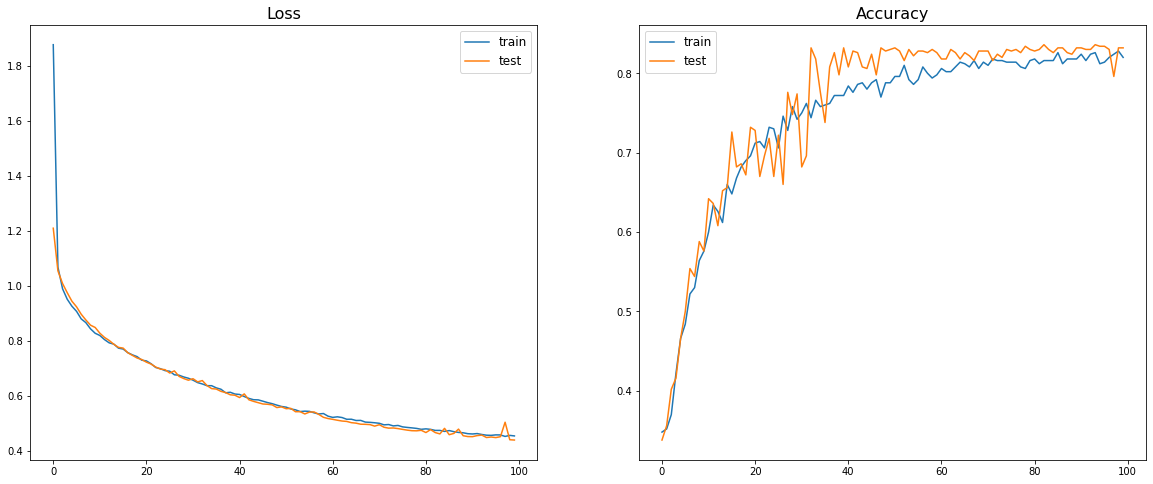

In [ ]:
# fit mlp model on problem 2 and save model to file
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
  # generate samples
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2,
      random_state=seed)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, trainy, testX, testy

# define and fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
  # define model
  model = Sequential()
  model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(5, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(3, activation='softmax'))
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0) 
  return model, history

# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy): # evaluate the model
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0) 
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss during training
  pyplot.figure(figsize = (20,8))
  pyplot.subplot(121)
  pyplot.title('Loss', fontsize = 16) 
  pyplot.plot(history.history['loss'], label='train') 
  pyplot.plot(history.history['val_loss'], label='test') 
  pyplot.legend(fontsize = 12)
  # plot accuracy during training
  pyplot.subplot(122)
  pyplot.title('Accuracy', fontsize = 16) 
  pyplot.plot(history.history['accuracy'], label='train') 
  pyplot.plot(history.history['val_accuracy'], label='test') 
  pyplot.legend(fontsize = 12)
  pyplot.show()

# prepare data
trainX, trainy, testX, testy = samples_for_seed(2)

# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)

# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)

## 9.3. MLP With Transfer Learning for Problem 2

Train: 0.794, Test: 0.818


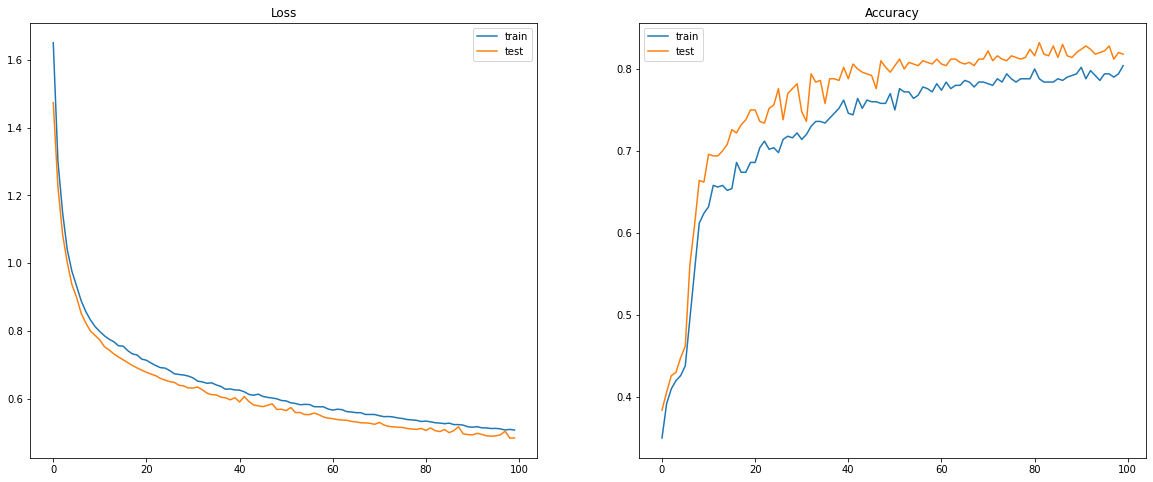

In [ ]:
# transfer learning with mlp model on problem 2
from sklearn.datasets.samples_generator import make_blobs
from keras.utils.np_utils import to_categorical
from keras.models import load_model
from matplotlib import pyplot

# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
  # generate samples
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2,
      random_state=seed)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, trainy, testX, testy

# load and re-fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
  # load model
  model = load_model('model.h5')
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 
  # re-fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
  return model, history

# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy): 
    # evaluate the model
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0) 
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  # plot loss during training
  pyplot.figure(figsize = (20,8))
  pyplot.subplot(121)
  pyplot.title('Loss') 
  pyplot.plot(history.history['loss'], label='train') 
  pyplot.plot(history.history['val_loss'], label='test') 
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(122)
  pyplot.title('Accuracy') 
  pyplot.plot(history.history['accuracy'], label='train') 
  pyplot.plot(history.history['val_accuracy'], label='test') 
  pyplot.legend()
  pyplot.show()

# prepare data
trainX, trainy, testX, testy = samples_for_seed(2)
# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)
# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)

## 9.4. Compare Standalone MLP to transfer learning

Standalone 0.775 (0.087)
Transfer (fixed=0) 0.818 (0.000)
Transfer (fixed=1) 0.820 (0.000)
Transfer (fixed=2) 0.822 (0.000)


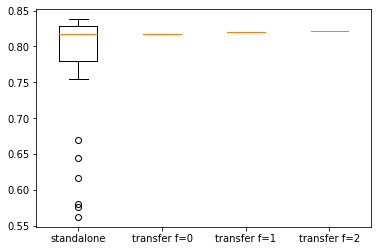

In [ ]:
#compare standalone mlp model performance to transfer learning
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import load_model
from matplotlib import pyplot
from numpy import mean
from numpy import std

# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
  # generate samples
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2,
      random_state=seed)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, trainy, testX, testy

# define and fit model on a training dataset
def fit_model(trainX, trainy):
  # define model
  model = Sequential()
  model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(5, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(3, activation='softmax'))
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # fit model
  model.fit(trainX, trainy, epochs=100, verbose=0)
  return model

# repeated evaluation of a standalone model
def eval_standalone_model(trainX, trainy, testX, testy, n_repeats):
  scores = list()
  for _ in range(n_repeats):
    # define and fit a new model on the train dataset
    model = fit_model(trainX, trainy)
    # evaluate model on test dataset
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    scores.append(test_acc)
  return scores

# repeated evaluation of a model with transfer learning
def eval_transfer_model(trainX, trainy, testX, testy, n_fixed, n_repeats):
  scores = list()
  for _ in range(n_repeats):
    # load model
    model = load_model('model.h5')
    # mark layer weights as fixed or not trainable 
    for i in range(n_fixed):
     model.layers[i].trainable = False
    # re-compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 
    # fit model on train dataset
    model.fit(trainX, trainy, epochs=100, verbose=0)
    # evaluate model on test dataset
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    scores.append(test_acc)
  return scores

# prepare data for problem 2
trainX, trainy, testX, testy = samples_for_seed(2)
n_repeats = 30
dists, dist_labels = list(), list()

# repeated evaluation of standalone model
standalone_scores = eval_standalone_model(trainX, trainy, testX, testy, n_repeats) 
print('Standalone %.3f (%.3f)' % (mean(standalone_scores), std(standalone_scores))) 
dists.append(standalone_scores)
dist_labels.append('standalone')

# repeated evaluation of transfer learning model, vary fixed layers
n_fixed = 3
for i in range(n_fixed):
  scores = eval_transfer_model(trainX, trainy, testX, testy, i, n_repeats) 
  print('Transfer (fixed=%d) %.3f (%.3f)' % (i, mean(scores), std(scores))) 
  dists.append(scores)
  dist_labels.append('transfer f='+str(i))
# box and whisker plot of score distributions
pyplot.boxplot(dists, labels=dist_labels)
pyplot.show()